[2025-02-14 Fiddler](https://thefiddler.substack.com/p/can-you-squeeze-the-heart)
====================

Fiddler
-------
Let the $x = 0$, $y = 0$ be the center of the circle, with radius $r$.
By symmetry, only need to consider $x > 0$.  The corners of the square
are $x = 0$, $y = \sqrt2 - r$, and $x = \sqrt2/2$, $y = \sqrt2/2 - r$.

The semicircle center is at $x = \sqrt2/4$, $y = 3\sqrt2/4 - r$, so the
arc of the semicircle is $(x - \sqrt2/4)^2 + (y - 3\sqrt2/4 + r)^2 = 1/4$.

Solve for where the semicircle intersects the circle $x^2 + y^2 = r^2$.

In [1]:
x,y,r = var("x,y,r")

In [2]:
eqn = (sqrt(r^2-y^2) - sqrt(2)/4)^2 + (y - 3*sqrt(2)/4 + r)^2 == 1/4
eqn2 = (eqn.expand() - 1/4 + 1/2*sqrt(2)*sqrt(r^2-y^2))^2

In [3]:
assume(r, "real")
assume(y, "real")
assume(r > 0)
assume(y > 0)
sol = solve(eqn2, y)

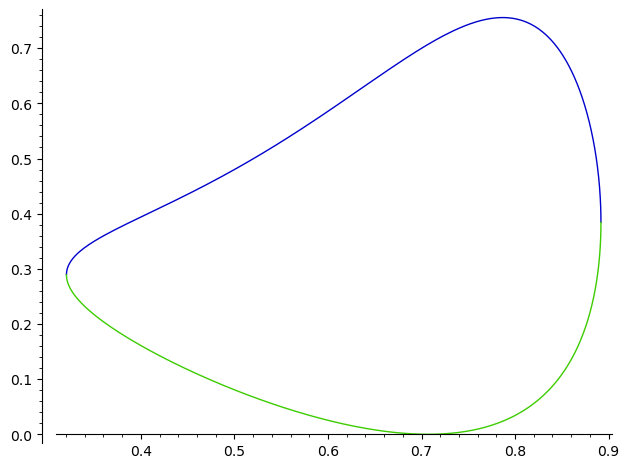

In [4]:
plot([sol[0].rhs(),sol[1].rhs()], (3/7*sqrt(2)-2/7,3/7*sqrt(2)+2/7))

In [5]:
solve(sol[0].rhs() - sol[1].rhs() == 0, r)

[r == 3/7*sqrt(2) - 2/7, r == 3/7*sqrt(2) + 2/7]

The smaller root is when the circle is tangent to the continuation of the semicircle within the square.
The greater root, $r = \frac{2 + 3\sqrt2}7$ is the answer.

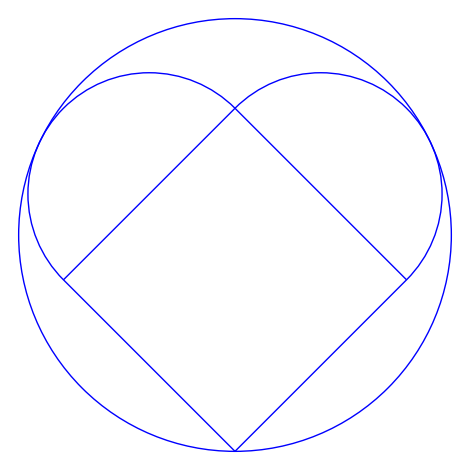

In [6]:
r0 = 3/7*sqrt(2)+2/7
(circle((0,0),r0,axes=false)
 + polygon([(0,-r0),(sqrt(2)/2,sqrt(2)/2-r0),(0,sqrt(2)-r0),(-sqrt(2)/2,sqrt(2)/2-r0)],fill=false)
 + arc((sqrt(2)/4,3*sqrt(2)/4-r0),1/2,sector=(-pi/4,3*pi/4))
 + arc((-sqrt(2)/4,3*sqrt(2)/4-r0),1/2,sector=(pi/4,5*pi/4))
)

Extra credit
------------
If we join the two hearts along an edge of the squares, the center of the circle will be on that edge.

Let $d$ be the displacement of the center of the square in the direction parallel to the joining edge
from the center the circle.

The arc of the semicircle opposite the joining edge is $(x-1)^2 + (y-d)^2 = 1/4$.


In [7]:
d = var("d")
ec = (sqrt(r^2-y^2) - 1)^2 + (y-d)^2 == 1/4
ec2 = (ec.expand() - 1/4 + 2*sqrt(r^2-y^2))^2

In [8]:
sol2 = solve(ec2, y)
sol2

[y == 1/8*(4*d^3 + 4*d*r^2 + 3*d - sqrt(-16*d^4 - 16*r^4 + 8*(4*d^2 + 5)*r^2 - 24*d^2 - 9))/(d^2 + 1), y == 1/8*(4*d^3 + 4*d*r^2 + 3*d + sqrt(-16*d^4 - 16*r^4 + 8*(4*d^2 + 5)*r^2 - 24*d^2 - 9))/(d^2 + 1)]

In [9]:
sol3 = solve(sol2[0].rhs() == sol2[1].rhs(), r)
sol3

[r == 1/2*sqrt(4*d^2 + 4*sqrt(d^2 + 1) + 5), r == 1/2*sqrt(4*d^2 - 4*sqrt(d^2 + 1) + 5)]

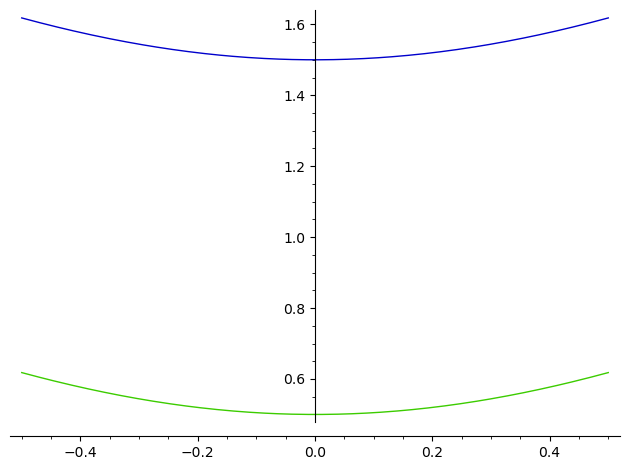

In [10]:
plot([sol3[0].rhs(),sol3[1].rhs()], (-1/2,1/2))

In [11]:
solve(derivative(sol3[0].rhs(),d) == 0, d)

[d == 0, sqrt(d^2 + 1) == (-1/2)]

So if the two hearts are joined along a square edge, the minimum radius is $3/2$.

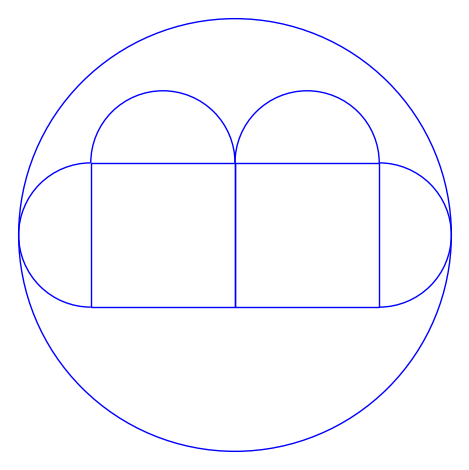

In [12]:
(circle((0,0),3/2,axes=false)
 + polygon([(0,1/2),(0,-1/2),(-1,-1/2),(-1,1/2)],fill=false)
 + arc((-1,0),1/2,sector=(pi/2,3*pi/2))
 + arc((-1/2,1/2),1/2,sector=(0,pi))
 + polygon([(0,1/2),(0,-1/2),(1,-1/2),(1,1/2)],fill=false)
 + arc((1,0),1/2,sector=(-pi/2,pi/2))
 + arc((1/2,1/2),1/2,sector=(0,pi))
)

Consider putting the corner of one heart between the lobes of the other heart.

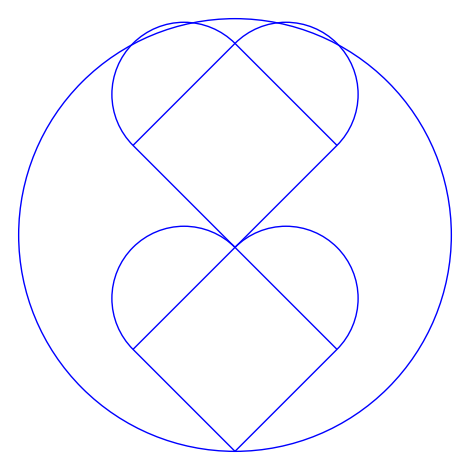

In [13]:
r0 = 3/2
(circle((0,0),r0,axes=false)
 + polygon([(0,-r0),(sqrt(2)/2,sqrt(2)/2-r0),(0,sqrt(2)-r0),(-sqrt(2)/2,sqrt(2)/2-r0)],fill=false)
 + arc((sqrt(2)/4,3*sqrt(2)/4-r0),1/2,sector=(-pi/4,3*pi/4))
 + arc((-sqrt(2)/4,3*sqrt(2)/4-r0),1/2,sector=(pi/4,5*pi/4))
 + polygon([(0,sqrt(2)-r0),(sqrt(2)/2,3*sqrt(2)/2-r0),(0,2*sqrt(2)-r0),(-sqrt(2)/2,3*sqrt(2)/2-r0)],fill=false)
 + arc((sqrt(2)/4,7*sqrt(2)/4-r0),1/2,sector=(-pi/4,3*pi/4))
 + arc((-sqrt(2)/4,7*sqrt(2)/4-r0),1/2,sector=(pi/4,5*pi/4)) 
)

The minimum radius is more than $3/2$.

Consider joining the hearts at the lobes.

If one semicircle center is at $x = d$, $y = h$, the other is at $x = d-1/\sqrt2$, $y=h$, and by
symmetry, is tangent to the other heart's lobe at $x=0$, $y=0$, so $d^2 + h^2 = 1/4$.

For the other lobe to also be tangent to the other heart's lobe, $(2d-1/\sqrt2)^2 + 4h^2 = 1$.

In [14]:
solve((2*d-1/sqrt(2))^2 + 4*(1/4 - d^2) == 1, d)

[d == 1/8*sqrt(2)]

In [15]:
h = var("h")
h == sqrt(1/4-(sqrt(2)/8)^2)

h == 1/4*sqrt(7/2)

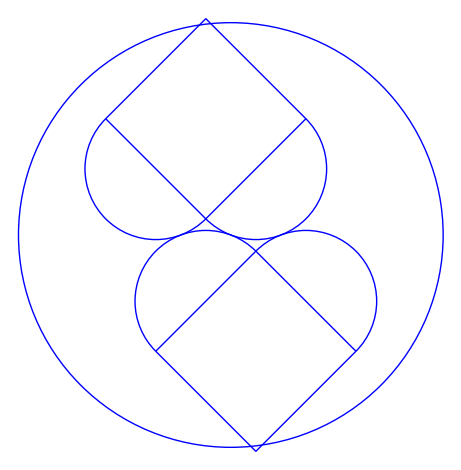

In [16]:
r0 = 3/2
d0 = sqrt(2)/8
h0 = sqrt(1/4-d0^2)
x0 = d0-sqrt(2)/4
y0 = h0-sqrt(2)/4
(circle((0,0),r0,axes=false)
 + polygon([(x0,y0),(x0+sqrt(2)/2,y0+sqrt(2)/2),(x0,y0+sqrt(2)),(x0-sqrt(2)/2,y0+sqrt(2)/2)],fill=false)
 + arc((d0,h0),1/2,sector=(-3*pi/4,pi/4))
 + arc((d0-sqrt(2)/2,h0),1/2,sector=(3*pi/4,7*pi/4))
 + polygon([(-x0,-y0),(-x0-sqrt(2)/2,-y0-sqrt(2)/2),(-x0,-y0-sqrt(2)),(-x0+sqrt(2)/2,-y0-sqrt(2)/2)],fill=false)
 + arc((-d0,-h0),1/2,sector=(pi/4,5*pi/4))
 + arc((-d0+sqrt(2)/2,-h0),1/2,sector=(-pi/4,3*pi/4))
)

And the minimum radius for this case is also more than $3/2$.

Consider joining the lobes with an edge of the square.  A lower bound for the diameter
is $3\sqrt2/4 + 1/2 + 3/2 > 3$, so the minimum radius for this case is also more than $3/2$.

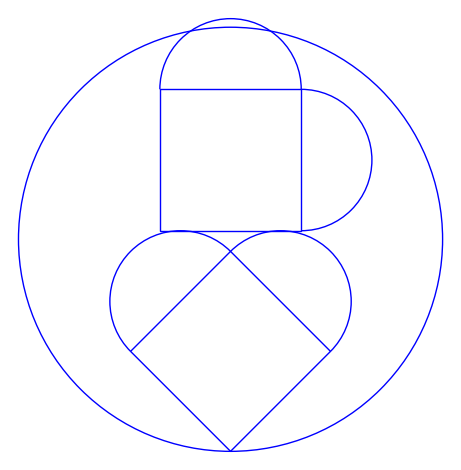

In [17]:
(circle((0,0),3/2,axes=false)
 + polygon([(0,-3/2),(sqrt(2)/2,sqrt(2)/2-3/2),(0,sqrt(2)-3/2),(-sqrt(2)/2,sqrt(2)/2-3/2)],fill=false)
 + arc((sqrt(2)/4,3*sqrt(2)/4-3/2),1/2,sector=(-pi/4,3*pi/4))
 + arc((-sqrt(2)/4,3*sqrt(2)/4-3/2),1/2,sector=(pi/4,5*pi/4))
 + polygon([(-1/2,1/2+3/4*sqrt(2)-3/2),(1/2,1/2+3/4*sqrt(2)-3/2),(1/2,3/2+3/4*sqrt(2)-3/2),(-1/2,3/2+3/4*sqrt(2)-3/2)],fill=false)
 + arc((1/2,1+3/4*sqrt(2)-3/2),1/2,sector=(-pi/2,pi/2))
 + arc((0,3/2+3/4*sqrt(2)-3/2),1/2,sector=(0,pi))
)

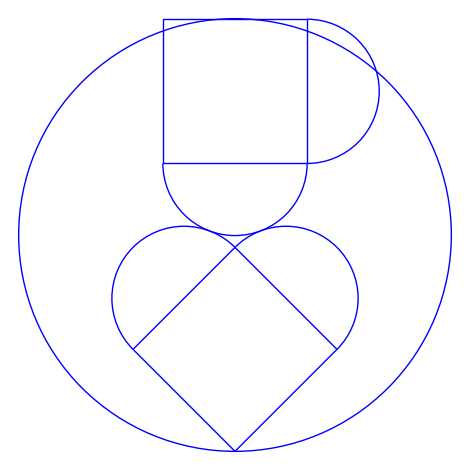

In [18]:
(circle((0,0),3/2,axes=false)
 + polygon([(0,-3/2),(sqrt(2)/2,sqrt(2)/2-3/2),(0,sqrt(2)-3/2),(-sqrt(2)/2,sqrt(2)/2-3/2)],fill=false)
 + arc((sqrt(2)/4,3*sqrt(2)/4-3/2),1/2,sector=(-pi/4,3*pi/4))
 + arc((-sqrt(2)/4,3*sqrt(2)/4-3/2),1/2,sector=(pi/4,5*pi/4))
 + polygon([(-1/2,sqrt(7/8)+3/4*sqrt(2)-3/2),(1/2,sqrt(7/8)+3/4*sqrt(2)-3/2),(1/2,1+sqrt(7/8)+3/4*sqrt(2)-3/2),(-1/2,1+sqrt(7/8)+3/4*sqrt(2)-3/2)],fill=false)
 + arc((1/2,1/2+sqrt(7/8)+3/4*sqrt(2)-3/2),1/2,sector=(-pi/2,pi/2))
 + arc((0,sqrt(7/8)+3/4*sqrt(2)-3/2),1/2,sector=(-pi,0))
)

For another lower bound, the area of two hearts is $2+\pi/2$, so $r > \sqrt{1/2+2/\pi}$.

In [19]:
numerical_approx(sqrt(1/2+2/pi))

1.06612371344398

Consider tilting the heart.  If the circle has radius $r$ and the corner of one heart is
at $x = 0$, $y = -r$, and the tilt is $\theta$, then arc of the lobe is
$(x - \cos\theta + (1/2)\sin\theta)^2 + (y + r - (1/2)\cos\theta - \sin\theta)^2 = 1/4$.

In [20]:
theta = var("theta")
eqn10 = (sqrt(r^2-y^2) - cos(theta) + 1/2*sin(theta))^2 + (y+r-1/2*cos(theta)-sin(theta))^2 == 1/4
eqn11 = (eqn10.expand() - 1/4 + sqrt(r^2-y^2)*(-sin(theta)+2*cos(theta)))^2
eqn11

1/16*(8*r^2 + 8*r*y - 4*r*cos(theta) - 4*y*cos(theta) + 5*cos(theta)^2 - 8*r*sin(theta) - 8*y*sin(theta) + 5*sin(theta)^2 + 4*sqrt(r^2 - y^2)*(2*cos(theta) - sin(theta)) - 8*sqrt(r^2 - y^2)*cos(theta) + 4*sqrt(r^2 - y^2)*sin(theta) - 1)^2 == (r^2 - y^2)*(2*cos(theta) - sin(theta))^2

In [21]:
sol10 = solve(eqn11, y)
sol11 = solve((sol10[0].rhs() - sol10[1].rhs()).simplify_full(), r)
sol11

[r == -(sqrt(cos(theta)^2 + sin(theta)^2) - cos(theta) - 2*sin(theta))/(4*cos(theta)*sin(theta) + 3*sin(theta)^2), r == (sqrt(cos(theta)^2 + sin(theta)^2) + cos(theta) + 2*sin(theta))/(4*cos(theta)*sin(theta) + 3*sin(theta)^2)]

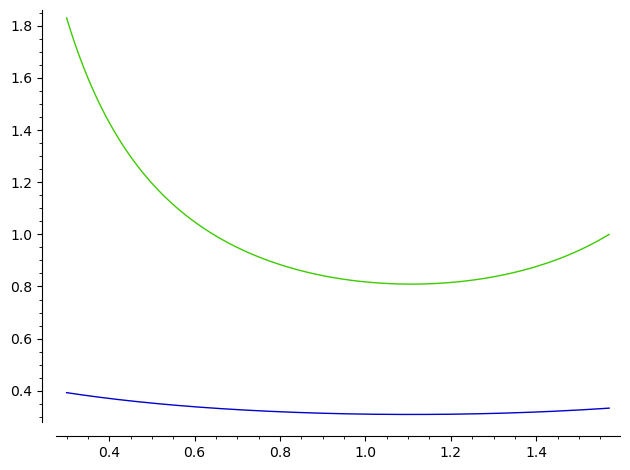

In [22]:
plot([sol11[0].rhs(),sol11[1].rhs()], 0.3, pi/2)

1.49999349833371


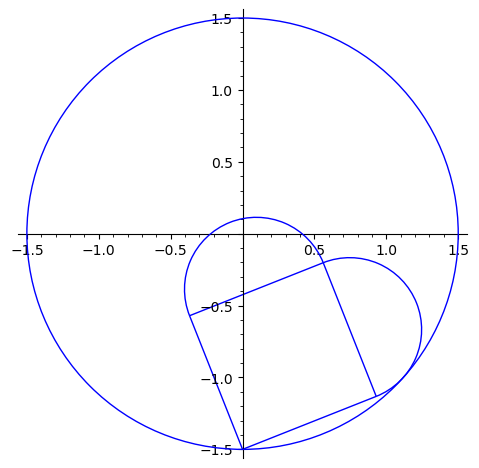

In [23]:
t0 = 0.377423
r0 = sol11[1].rhs()(theta=t0)
print(r0)
(circle((0,0),r0)
 + polygon([(0,-r0),(cos(t0),sin(t0)-r0),(cos(t0)-sin(t0),sin(t0)+cos(t0)-r0),(-sin(t0),cos(t0)-r0)],fill=false)
 + arc((cos(t0)-1/2*sin(t0),-r0+sin(t0)+1/2*cos(t0)),1/2,sector=(t0-pi/2,t0+pi/2))
 + arc((1/2*cos(t0)-sin(t0),-r0+cos(t0)+1/2*sin(t0)),1/2,sector=(t0,t0+pi))
)

It looks plausible that a second heart, with both lobes touching the lobe encompassing the origin
could fit within the circle with radius less than $3/2$.

The center of the lobe is $x = (1/2)\cos\theta - \sin\theta$, $y = \cos\theta + (1/2)\sin\theta -r$.

Let $\phi$ be the angle of rotation of the second heart around the center of the lobe.

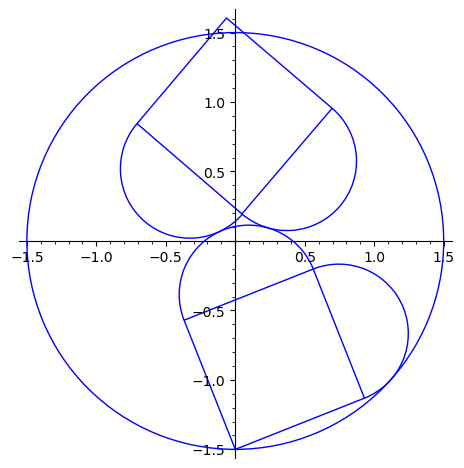

In [24]:
t0 = 0.377423
p0 = 1.9*pi/4
alpha = atan(sqrt(2)/4+0.021)
r0 = sol11[1].rhs()(theta=t0)
(circle((0,0),r0)
 + polygon([(0,-r0),(cos(t0),sin(t0)-r0),(cos(t0)-sin(t0),sin(t0)+cos(t0)-r0),(-sin(t0),cos(t0)-r0)],fill=false)
 + arc((cos(t0)-1/2*sin(t0),-r0+sin(t0)+1/2*cos(t0)),1/2,sector=(t0-pi/2,t0+pi/2))
 + arc((1/2*cos(t0)-sin(t0),-r0+cos(t0)+1/2*sin(t0)),1/2,sector=(t0,t0+pi))
# + circle((1/2*cos(t0)-sin(t0),cos(t0)+1/2*sin(t0)-r0),0.01)
# + line([(1/2*cos(t0)-sin(t0),cos(t0)+1/2*sin(t0)-r0),(1/2*cos(t0)-sin(t0)-cos(p0+alpha),cos(t0)+1/2*sin(t0)-r0+sin(p0+alpha))])
# + line([(1/2*cos(t0)-sin(t0),cos(t0)+1/2*sin(t0)-r0),(1/2*cos(t0)-sin(t0)-cos(p0-alpha),cos(t0)+1/2*sin(t0)-r0+sin(p0-alpha))])
 + arc((1/2*cos(t0)-sin(t0)-cos(p0+alpha),cos(t0)+1/2*sin(t0)-r0+sin(p0+alpha)),1/2,sector=(-pi/4-p0,3*pi/4-p0))
 + arc((1/2*cos(t0)-sin(t0)-cos(p0-alpha),cos(t0)+1/2*sin(t0)-r0+sin(p0-alpha)),1/2,sector=(-3*pi/4-p0,pi/4-p0))
 + polygon([(1/2*cos(t0)-sin(t0)-cos(p0+alpha)+1/2*cos(p0+pi/4),
             cos(t0)+1/2*sin(t0)-r0+sin(p0+alpha)-1/2*sin(p0+pi/4)),
            (1/2*cos(t0)-sin(t0)-cos(p0+alpha)-1/2*cos(p0+pi/4),
             cos(t0)+1/2*sin(t0)-r0+sin(p0+alpha)+1/2*sin(p0+pi/4)),
            (1/2*cos(t0)-sin(t0)-cos(p0+alpha)-1/2*cos(p0+pi/4)+sin(-p0-pi/4),
             cos(t0)+1/2*sin(t0)-r0+sin(p0+alpha)+1/2*sin(p0+pi/4)-cos(-p0-pi/4)),
            (1/2*cos(t0)-sin(t0)-cos(p0-alpha)-1/2*cos(-p0+pi/4),
             cos(t0)+1/2*sin(t0)-r0+sin(p0-alpha)-1/2*sin(-p0+pi/4))
           ],fill=false)
)

And it looks like the minimum $r$ for which two hearts can fit in the circle in this manner is
greater than $3/2$, so the answer seems to be $3/2$.